In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import scipy.spatial.distance
import sklearn
import sklearn.metrics

from matplotlib import pyplot as plt
from scipy.sparse import lil_matrix
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive', force_remount = True)

# change directory
os.chdir("/content/drive/MyDrive/Courses/INST414")


Mounted at /content/drive


In [4]:
df = pd.read_csv("car_info.csv")

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [7]:
df.dropna(inplace=True)
df=df.drop_duplicates()
df.describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


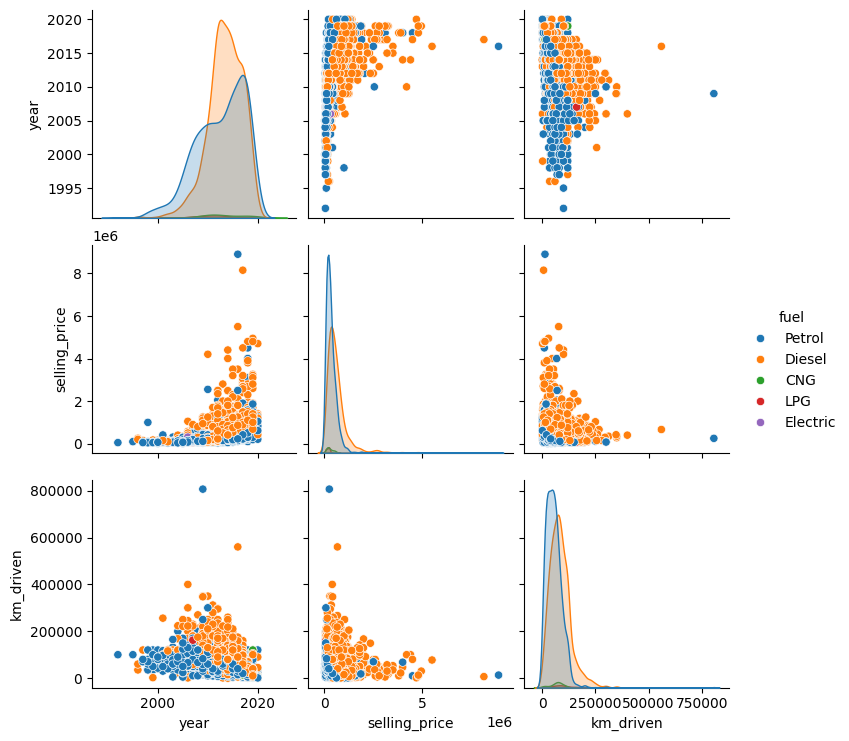

In [8]:
sns.pairplot(df, hue='fuel')

plt.show()

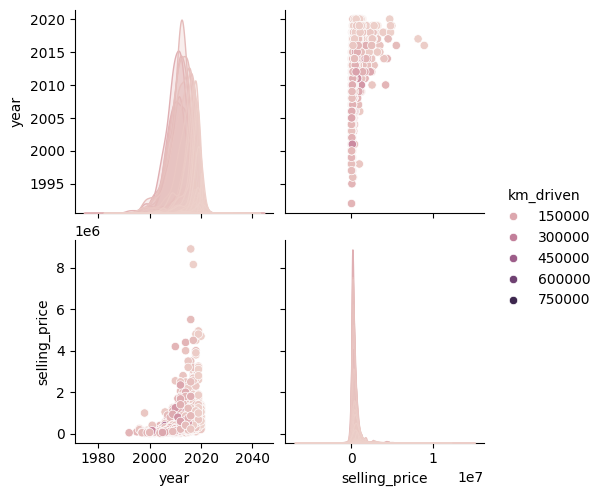

In [9]:
sns.pairplot(df, hue='km_driven')

plt.show()

In [12]:
!pip uninstall scipy -y
!pip uninstall pingouin -y
!pip install pingouin

Found existing installation: scipy 1.15.2
Uninstalling scipy-1.15.2:
  Successfully uninstalled scipy-1.15.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 50.0 MB/s eta 0:00:00


In [16]:
import pingouin as pg
mod1 = pg.linear_regression(df, df['selling_price'])
mod1.round(2)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''